# Taxi Driver Boostrap

In [2]:
# python 3.9.7
import os
import sys

# if jupyter python path is being a bitch
# !{sys.executable} -m pip install pygame

import gym
import numpy as np
import torch
import time
import matplotlib.pyplot as plt
import pickle



## Test Environment

In [8]:
print(gym.envs.registry.all())

ValuesView(├──CartPole: [ v0, v1 ]
├──MountainCar: [ v0 ]
├──MountainCarContinuous: [ v0 ]
├──Pendulum: [ v1 ]
├──Acrobot: [ v1 ]
├──LunarLander: [ v2 ]
├──LunarLanderContinuous: [ v2 ]
├──BipedalWalker: [ v3 ]
├──BipedalWalkerHardcore: [ v3 ]
├──CarRacing: [ v1 ]
├──Blackjack: [ v1 ]
├──FrozenLake: [ v1 ]
├──FrozenLake8x8: [ v1 ]
├──CliffWalking: [ v0 ]
├──Taxi: [ v3 ]
├──Reacher: [ v2 ]
├──Pusher: [ v2 ]
├──Thrower: [ v2 ]
├──Striker: [ v2 ]
├──InvertedPendulum: [ v2 ]
├──InvertedDoublePendulum: [ v2 ]
├──HalfCheetah: [ v2, v3 ]
├──Hopper: [ v2, v3 ]
├──Swimmer: [ v2, v3 ]
├──Walker2d: [ v2, v3 ]
├──Ant: [ v2, v3 ]
├──Humanoid: [ v2, v3 ]
└──HumanoidStandup: [ v2 ]
)


In [4]:
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

0
1
1
0
0
4
4
0
0
0
0
4
4
Episode finished after 13 timesteps
0
4
0
0
1
0
0
1
2
2
2
3
3
Episode finished after 13 timesteps
0
4
Episode finished after 2 timesteps
0
0
0
0
1
1
Episode finished after 6 timesteps
0
0
0
0
0
0
0
4
Episode finished after 8 timesteps
0
1
1
2
2
3
2
2
2
1
Episode finished after 10 timesteps
0
1
1
2
2
3
3
2
1
1
0
1
2
1
2
6
10
14
14
10
6
10
9
8
Episode finished after 24 timesteps
0
0
0
0
0
0
4
0
0
0
0
0
0
0
4
0
1
Episode finished after 17 timesteps
0
4
Episode finished after 2 timesteps
0
1
2
3
2
1
1
0
0
1
2
3
3
3
Episode finished after 14 timesteps
0
1
Episode finished after 2 timesteps
0
0
0
4
8
Episode finished after 5 timesteps
0
0
0
0
0
0
4
4
4
4
Episode finished after 10 timesteps
0
0
1
Episode finished after 3 timesteps
0
0
4
Episode finished after 3 timesteps
0
4
Episode finished after 2 timesteps
0
0
0
0
4
4
0
0
0
0
4
Episode finished after 11 timesteps
0
0
0
1
Episode finished after 4 timesteps
0
4
8
8
8
9
8
8
4
8
Episode finished after 10 timesteps
0
0

## Frozen Lake

## Q-Learning

In [4]:
env = gym.make('FrozenLake-v1')
print("Action Space:         ", env.action_space)
print("Observation Space:    ", env.observation_space)

Action Space:          Discrete(4)
Observation Space:     Discrete(16)


In [5]:
def solve_frozen_lake_qlearning():
    gamma = 0.95
    learning_rate = 0.9
    egreedy = 0.7
    egreedy_final = 0.1
    egreedy_decay = 0.999
    num_episodes = 1000
    steps_total = []
    rewards_total = []
    egreedy_total = []
    number_of_states = env.observation_space.n
    number_of_actions = env.action_space.n
    Q = torch.zeros([number_of_states, number_of_actions])

    for i_episode in range(num_episodes):

        # resets the environment
        state = env.reset()
        step = 0
        while True:

            step += 1

            random_for_egreedy = torch.rand(1)[0]


            if random_for_egreedy > egreedy:
                random_values = Q[state] + torch.rand(1,number_of_actions) / 1000
                action = torch.max(random_values,1)[1][0]
                action = action.item()
            else:
                action = env.action_space.sample()

            if egreedy > egreedy_final:
                egreedy *= egreedy_decay

            new_state, reward, done, info = env.step(action)

            # Filling the Q Table
            Q[state, action] = reward + gamma * torch.max(Q[new_state])

            # Setting new state for next action
            state = new_state

            # env.render()
            # time.sleep(0.4)

            if done:
                steps_total.append(step)
                rewards_total.append(reward)
                egreedy_total.append(egreedy)
                if i_episode % 10 == 0:
                    print('Episode: {} Reward: {} Steps Taken: {}'.format(i_episode,reward, step))
                break



In [6]:
solve_frozen_lake_qlearning()

Episode: 0 Reward: 0.0 Steps Taken: 30
Episode: 10 Reward: 0.0 Steps Taken: 9
Episode: 20 Reward: 0.0 Steps Taken: 21
Episode: 30 Reward: 0.0 Steps Taken: 9
Episode: 40 Reward: 0.0 Steps Taken: 8
Episode: 50 Reward: 0.0 Steps Taken: 3
Episode: 60 Reward: 0.0 Steps Taken: 15
Episode: 70 Reward: 0.0 Steps Taken: 12
Episode: 80 Reward: 0.0 Steps Taken: 9
Episode: 90 Reward: 0.0 Steps Taken: 2
Episode: 100 Reward: 0.0 Steps Taken: 6
Episode: 110 Reward: 0.0 Steps Taken: 6
Episode: 120 Reward: 0.0 Steps Taken: 5
Episode: 130 Reward: 0.0 Steps Taken: 5
Episode: 140 Reward: 0.0 Steps Taken: 13
Episode: 150 Reward: 0.0 Steps Taken: 9
Episode: 160 Reward: 0.0 Steps Taken: 7
Episode: 170 Reward: 0.0 Steps Taken: 5
Episode: 180 Reward: 0.0 Steps Taken: 6
Episode: 190 Reward: 0.0 Steps Taken: 7
Episode: 200 Reward: 0.0 Steps Taken: 9
Episode: 210 Reward: 0.0 Steps Taken: 3
Episode: 220 Reward: 0.0 Steps Taken: 4
Episode: 230 Reward: 0.0 Steps Taken: 9
Episode: 240 Reward: 0.0 Steps Taken: 3
Episod

## SARSA

In [5]:
import random

import gym
import gym.envs.toy_text
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
%matplotlib inline

# define path
RESULT_IMG_PATH = 'img/result_img_{}.png'

amap='SFFFHFFFG'
grid_shape = int(np.sqrt(len(amap)))
custom_map = np.array(list(amap)).reshape(grid_shape, grid_shape)
env = gym.envs.toy_text.frozen_lake.FrozenLakeEnv(desc=custom_map).unwrapped
n_actions = env.action_space.n
n_states = env.observation_space.n
print("Action space:", n_actions)
print("State space:", n_states)


Action space: 4
State space: 9


In [ ]:
done = False
env.reset()
while not done:
    # randomly pick an action
    action = np.random.randint(n_actions)
    # get feedback from the environment
    obvervation, reward, done, info = env.step(action)
    # show the environment
    env.render()

In [2]:
n_episodes = 100
reward_array = np.zeros(n_episodes)
# performance of an agent taking random actions
t = trange(n_episodes)
# for each episode
for i in t:
    # reset environment
    env.reset()
    # done flag
    done = False
    while not done:
        # randomly pick an action
        action = np.random.randint(n_actions)
        # get feedback from the environment
        _, reward, done, _ = env.step(action)
        if done:
            # update processing bar
            t.set_description('Episode {} Reward {}'.format(i + 1, reward))
            t.refresh()
            reward_array[i] = reward
            break
env.close()

Episode 100 Reward 0.0: 100%|██████████| 100/100 [00:00<00:00, 582.03it/s]


In [3]:
avg_reward = round(np.mean(reward_array), 4)
print('Averaged reward per episode {}'.format(avg_reward))

Averaged reward per episode 0.15


NameError: name 'RESULT_IMG_PATH' is not defined

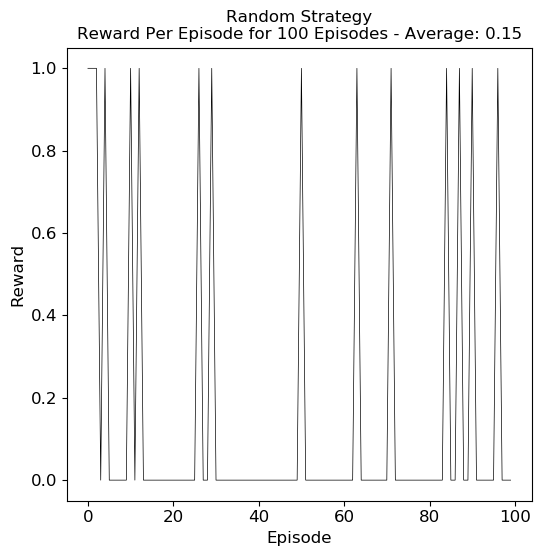

In [4]:
plt.subplots(figsize = (6, 6), dpi=100)
plt.plot(reward_array, color='black', linewidth=0.5)
plt.ylabel('Reward', fontsize=12)
plt.xlabel('Episode', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Random Strategy\nReward Per Episode for {} Episodes - Average: {:.2f}'.format(n_episodes, avg_reward),
          fontsize=12)
# plt.savefig(RESULT_IMG_PATH.format(0), dpi=100, bbox_inches='tight')
plt.show()

### Training

In [6]:
# initialize the agent’s Q-table to zeros
def init_q(s, a):
    """
    s: number of states
    a: number of actions
    """
    return np.zeros((s, a))

# epsilon-greedy exploration strategy
def epsilon_greedy(Q, epsilon, n_actions, s):
    """
    Q: Q Table
    epsilon: exploration parameter
    n_actions: number of actions
    s: state
    """
    # selects a random action with probability epsilon
    if np.random.random() <= epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(Q[s, :])

# SARSA Process
def sarsa(alpha, gamma, epsilon, n_episodes):
    """
    alpha: learning rate
    gamma: exploration parameter
    n_episodes: number of episodes
    """
    # initialize Q table
    Q = init_q(n_states, n_actions)
    t = trange(n_episodes)
    reward_array = np.zeros(n_episodes)
    for i in t:
        # initial state
        s = env.reset()
        # initial action
        a = epsilon_greedy(Q, epsilon, n_actions, s)
        done = False
        while not done:
            s_, reward, done, _ = env.step(a)
            a_ = epsilon_greedy(Q, epsilon, n_actions, s_)
            # update Q table
            Q[s, a] += alpha * (reward + (gamma * Q[s_, a_]) - Q[s, a])
            if done:
                t.set_description('Episode {} Reward {}'.format(i + 1, reward))
                t.refresh()
                reward_array[i] = reward
                break
            s, a = s_, a_
    env.close()
    return Q, reward_array

In [7]:
# experiment settings
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon=0.5 # exploration parameter
n_episodes = 1000 # number of training episodes

In [8]:
# training
Q, reward_array = sarsa(alpha, gamma, epsilon, n_episodes)

Episode 1000 Reward 0.0: 100%|██████████| 1000/1000 [00:05<00:00, 177.50it/s]


In [9]:
Q

array([[0.1164595 , 0.12155909, 0.12441601, 0.12339095],
       [0.09722865, 0.08112711, 0.12733082, 0.1466203 ],
       [0.30050647, 0.32156768, 0.37421591, 0.22484981],
       [0.15590415, 0.09792591, 0.09522506, 0.07145169],
       [0.        , 0.        , 0.        , 0.        ],
       [0.42740522, 0.43790027, 0.57565092, 0.18722926],
       [0.19644036, 0.27332096, 0.2102196 , 0.22771737],
       [0.25893197, 0.44231773, 0.43774671, 0.51808568],
       [0.        , 0.        , 0.        , 0.        ]])

In [10]:
# averaged reward per episode
avg_reward = round(np.mean(reward_array), 4)
print('Averaged reward per episode {}'.format(avg_reward))

Averaged reward per episode 0.273


### Testing

In [11]:
def eva(Q, n_episodes):
    """
    Q: trained Q table
    n_episodes: number of episodes
    """
    t = trange(n_episodes)
    reward_array = np.zeros(n_episodes)
    for i in t:
        # initial state
        s = env.reset()
        # initial action
        a = np.argmax(Q[s])
        done = False
        while not done:
            s_, reward, done, _ = env.step(a)
            # pick an action according the state and trained Q table
            a_ = np.argmax(Q[s_])
            if done:
                t.set_description('Episode {} Reward {}'.format(i + 1, reward))
                t.refresh()
                reward_array[i] = reward
                break
            s, a = s_, a_
    env.close()
    return reward_array

In [12]:
# experiment settings
n_episodes = 100 # number of testing episodes
reward_array = eva(Q, n_episodes)

Episode 100 Reward 1.0: 100%|██████████| 100/100 [00:00<00:00, 308.39it/s]


In [13]:
# averaged reward per episode
avg_reward = round(np.mean(reward_array), 4)
print('Averaged reward per episode {}'.format(avg_reward))

Averaged reward per episode 0.75


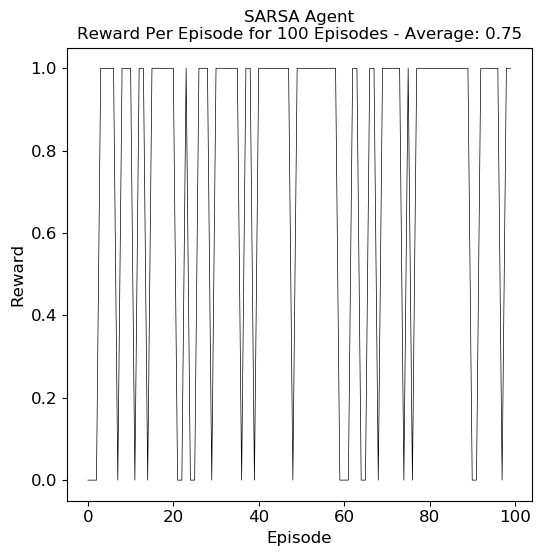

In [14]:
# show reward per episode
plt.subplots(figsize = (6, 6), dpi=100)
plt.plot(reward_array, color='black', linewidth=0.5)
plt.ylabel('Reward', fontsize=12)
plt.xlabel('Episode', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('SARSA Agent\nReward Per Episode for {} Episodes - Average: {:.2f}'.format(n_episodes, avg_reward),
          fontsize=12)
# plt.savefig(RESULT_IMG_PATH.format(1), dpi=100, bbox_inches='tight')
plt.show()

In [15]:
# trained SARSA agent in Frozen Lake
done = False
s = env.reset()
env.render()
while not done:
    # pick an action
    a = np.argmax(Q[s])
    # get feedback from the environment
    s_, _, done, _ = env.step(a)
    # show the environment
    env.render()
    s = s_